# Codding attension mechanisum 

### Computing attention vector for one word

In [2]:
# input embeding
import torch
inputs = torch.tensor(
    [[0.43, 0.15, 0.89], # Your (x^1)
    [0.55, 0.87, 0.66], # journey (x^2)
    [0.57, 0.85, 0.64], # starts (x^3)
    [0.22, 0.58, 0.33], # with (x^4)
    [0.77, 0.25, 0.10], # one (x^5)
    [0.05, 0.80, 0.55]] # step (x^6)
    )

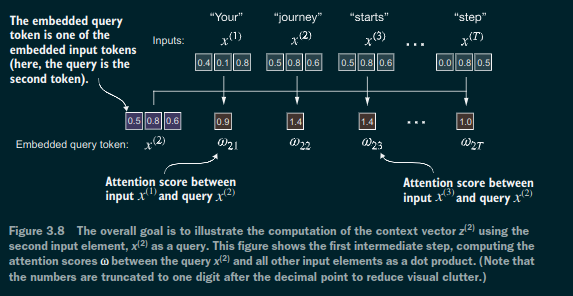

In [14]:
attn_scores_2 = torch.empty(inputs.shape[0])
query = inputs[1]

for i , input in enumerate(inputs):
    attn_scores_2[i] = torch.dot(query,input)

print("Attention scrore b/w input 2 and others inputs")
print(attn_scores_2)

Attention scrore b/w input 2 and others inputs
tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


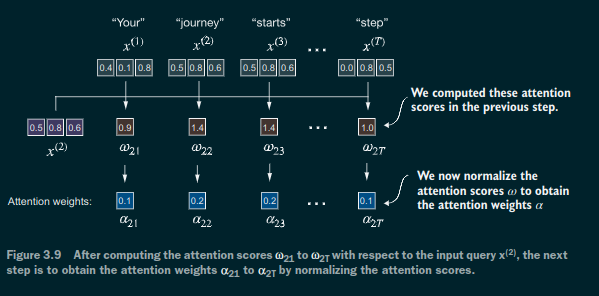

In [15]:
print("Normalized attention score")
nor_attn_2 = attn_scores_2 / attn_scores.sum()
print(nor_attn_2)
print("Sum of normalized attention")
print(nor_attn_2.sum())

Normalized attention score
tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum of normalized attention
tensor(1.0000)


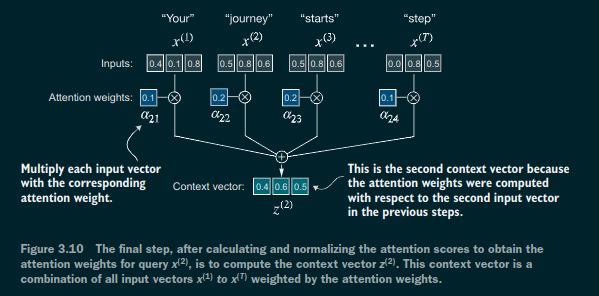

In [21]:
context_vec_2 = torch.zeros(query.shape)
for i , input in enumerate(inputs):
    context_vec_2 += nor_attn_2[i] * input

print(f'Context vector {context_vec_2}')

Context vector tensor([0.4355, 0.6451, 0.5680])


### Computing attention vector for all the words
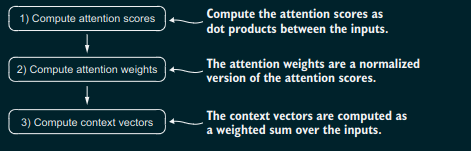

In [24]:
# computing attention scorces b/w the all the inputs

attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [25]:
# normalized attention scores
nor_attn = torch.softmax(attn_scores, dim = -1)
print(nor_attn)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [29]:
# context vector with attention scores
context_vector = nor_attn @ inputs
print(context_vector)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])
